<a href="https://colab.research.google.com/github/Popug-s-catcher/SpeechDenoizer/blob/main/FormaterWrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from google.colab import drive, files
import os
import io

Реформатирование в raw PCM 16-bit 48 kHz mono file

In [4]:
def simple_audio_converter():
    print("Загрузите аудиофайл:")
    uploaded = files.upload()

    if not uploaded:
        return

    filename = list(uploaded.keys())[0]

    # Загружаем и обрабатываем
    audio, sr = librosa.load(io.BytesIO(uploaded[filename]), sr=None, mono=False)

    print(f"Оригинал: {sr} Hz, {audio.ndim} канал(ов)")

    # Конвертируем
    if audio.ndim > 1:
        audio = np.mean(audio, axis=0)
    if sr != 48000:
        audio = librosa.resample(audio, orig_sr=sr, target_sr=48000)

    # 16-bit PCM
    audio_16bit = np.int16(audio / np.max(np.abs(audio)) * 32767)

    # Сохраняем
    output_file = "converted_audio.pcm"
    with open(output_file, 'wb') as f:
        audio_16bit.tofile(f)

    print(f"Готово: {output_file}")

# Запуск простой версии
simple_audio_converter()

Загрузите аудиофайл:


In [11]:
drive.mount('/content/drive')

def load_audio_from_drive(file_path):
    """Загрузка аудиофайла из Google Drive"""
    try:
        audio, sr = librosa.load(file_path, sr=None)
        print(f"Файл из Drive загружен: {os.path.basename(file_path)}")
        return audio, sr
    except Exception as e:
        print(f"Ошибка загрузки из Drive: {e}")
        return None, None

Mounted at /content/drive


In [7]:
def load_audio_from_computer():
    """Загрузка аудиофайла с компьютера"""
    print("Загрузите аудиофайл через диалоговое окно...")
    uploaded = files.upload()

    if not uploaded:
        print("Файл не загружен!")
        return None, None

    filename = list(uploaded.keys())[0]

    try:
        audio, sr = librosa.load(io.BytesIO(uploaded[filename]), sr=None)
        print(f"Файл '{filename}' успешно загружен")
        return audio, sr
    except Exception as e:
        print(f"Ошибка загрузки: {e}")
        return None, None

In [12]:
def plot_spectrogram(audio, sr, title="Аудиофайл"):
    """Отрисовка спектрограммы линейного спектра масштаба"""
    if audio is None:
        print("Нет данных для отрисовки")
        return

    # Конвертируем в моно если нужно
    if audio.ndim > 1:
        audio = np.mean(audio, axis=0)

    # Ограничиваем длительность для визуализации (первые 15 секунд)
    max_duration = 15
    max_samples = min(len(audio), int(max_duration * sr))
    audio_display = audio[:max_samples]

    # Создаем фигуру с двумя subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # 1. Спектрограмма линейного масштаба
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_display)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax1)
    ax1.set_title(f'{title}\nСпектрограмма (линейный масштаб)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Время (сек)')
    ax1.set_ylabel('Частота (Hz)')
    plt.colorbar(img, ax=ax1, format='%+2.0f dB')

    # 2. Волновая форма
    time_axis = np.linspace(0, len(audio_display)/sr, len(audio_display))
    ax2.plot(time_axis, audio_display, linewidth=0.8, color='blue', alpha=0.7)
    ax2.set_title('Волновая форма', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Время (сек)')
    ax2.set_ylabel('Амплитуда')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(-1, 1)

    # Выводим информацию об аудио
    duration = len(audio) / sr
    info_text = f"Частота: {sr} Hz | Длительность: {duration:.2f} сек | Сэмплов: {len(audio):,}"
    fig.suptitle(info_text, fontsize=12, y=0.02)

    plt.tight_layout()
    plt.show()

Запуск спектрограммы исходного файла с гугл-диска.

Файл из Drive загружен: testSig.ogg


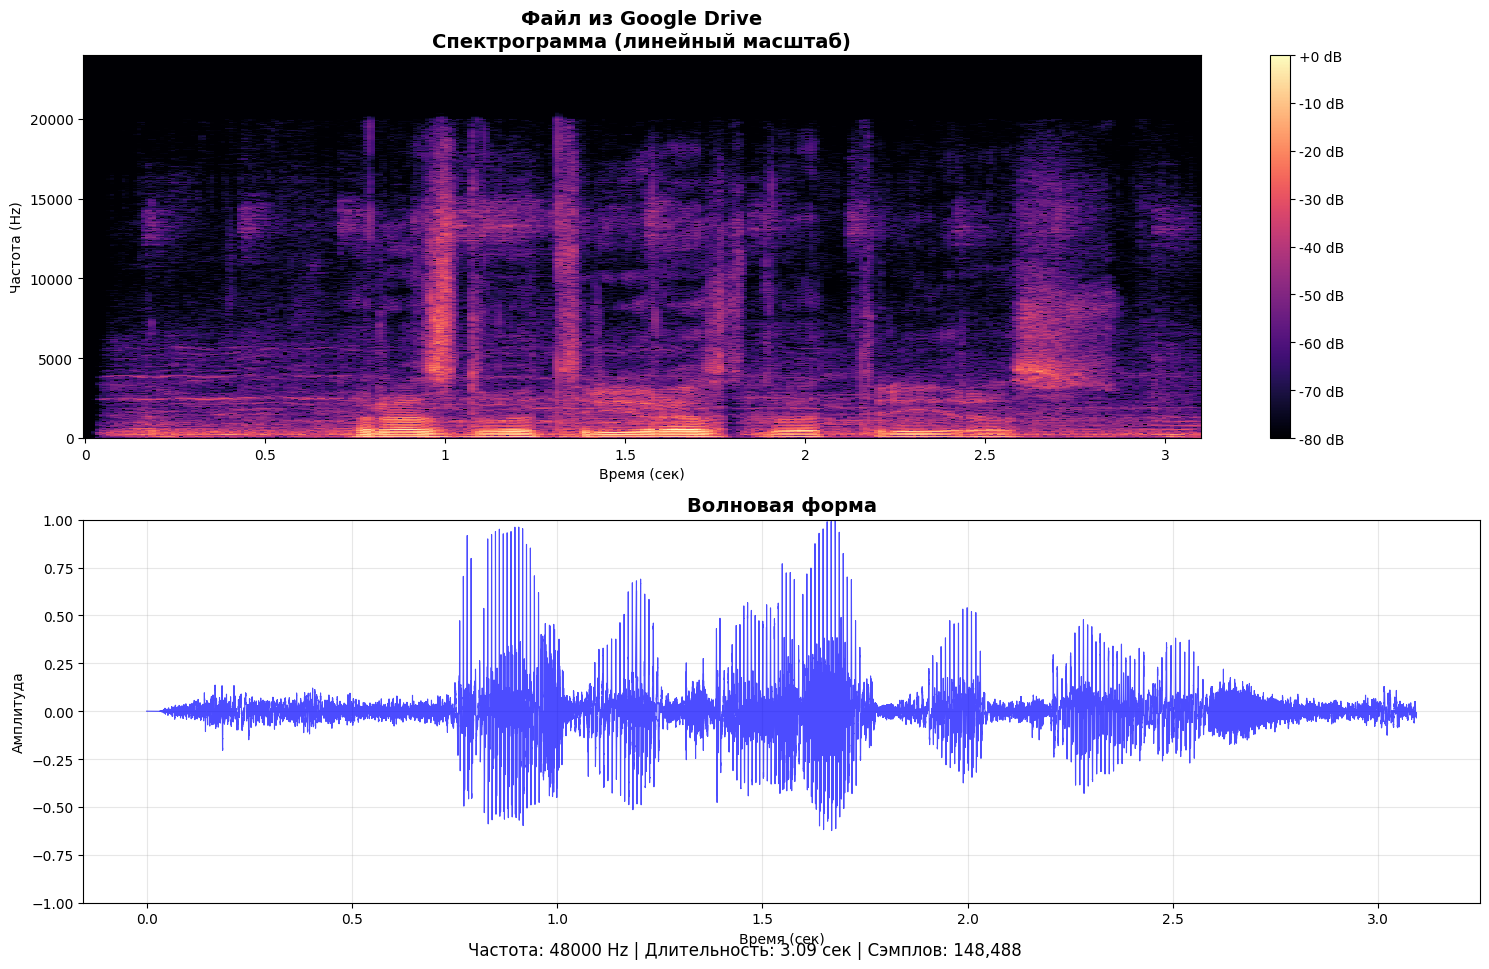

In [16]:
drive_audio, drive_sr = load_audio_from_drive("/content/testSig.ogg")
if drive_audio is not None:
    plot_spectrogram(drive_audio, drive_sr, "Файл из Google Drive")

Запуск спектрограммы реформатированного файла с гугл-диска.

In [17]:
drive_audio, drive_sr = load_audio_from_drive("/content/converted_audio.pcm")
if drive_audio is not None:
    plot_spectrogram(drive_audio, drive_sr, "Файл из Google Drive")

Ошибка загрузки из Drive: 


/tmp/ipython-input-267242699.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.12/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Запуск спектрограммы файла с компьютера.

In [14]:
computer_audio, computer_sr = load_audio_from_computer()
if computer_audio is not None:
    plot_spectrogram(computer_audio, computer_sr, "Файл с компьютера")

Загрузите аудиофайл через диалоговое окно...


Файл не загружен!
